In [4]:
import sys
sys.path.append('../..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import visualizor
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr

In [5]:
df = pd.read_csv('../../final_data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#mask = df.comment_idx < 0
mean_scores = df.groupby(['videoId', 'primaryTitle']).agg(
    sentiment=('sentimentPredictedScore', 'mean'),
    imdb_score=('averageRating', 'first'),
    network=('network', 'first'),
    num_comments=('commentId', 'count'),
    # comments_since=('comment_idx', 'min'),
    titleType=('titleType', 'first')
).reset_index()

In [7]:
mask = (mean_scores.num_comments >= 100)  # & (mean_scores.num_comments >= 100)
X = mean_scores[mask]

In [8]:
reg = LinearRegression()
reg.fit(X.sentiment.to_numpy().reshape(-1, 1), X.imdb_score.to_numpy().reshape(-1, 1))

LinearRegression()

In [9]:
corr, p_value = pearsonr(X.sentiment, X.imdb_score)

In [14]:
params = {
    'netflix': {
        'color': '#E24A33',
        'label': 'netflix'
    },
    'amazon': {
        'color': '#348ABD',
        'label': 'amazon'
    },
    'hbo': {
        'color': '#988ED5',
        'label': 'hbo'
    },
    'disney': {
        'color': '#8EBA42',
        'label': 'disney'
    }
}

Text(0.5, 1.0, 'Relation between sentiment on trailers and critical reception of movie/show')

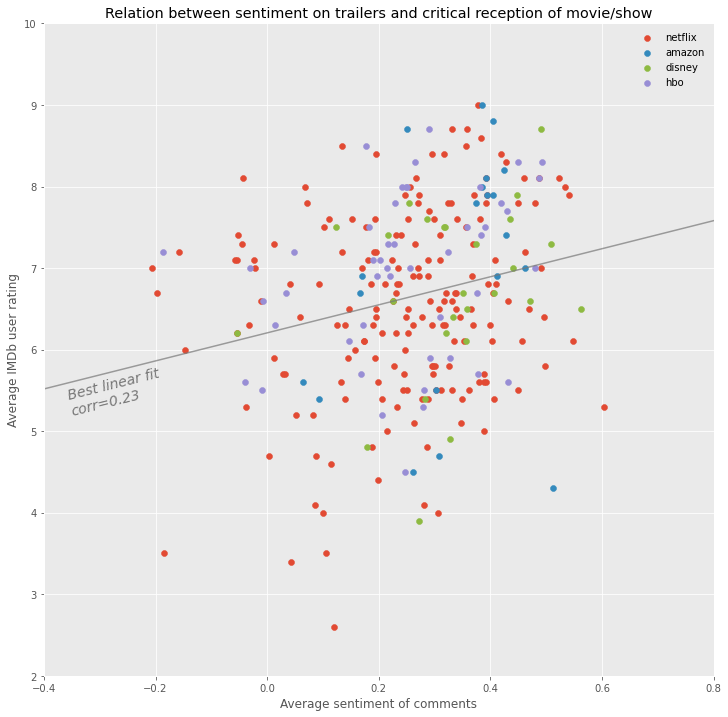

In [15]:
fig, ax = plt.subplots(figsize=(12,12))

for network in X.network.unique():
    mask = X.network == network
    ax.scatter(X[mask].sentiment, X[mask].imdb_score, **params[network])

ax.legend()

ax.set_ylim(2, 10)
ax.set_xlim(-.4, .8)
asdf = np.linspace(-1, 1, 10000)

ax.plot(asdf, reg.predict(asdf.reshape(-1,1)).flatten(), alpha=.7, color='#777777')
ax.text(-.36, 5.2, f'Best linear fit\ncorr={round(corr,2)}', rotation=14, fontsize=14, fontstyle='italic', color='#777777')

ax.set_xlabel('Average sentiment of comments')
ax.set_ylabel('Average IMDb user rating')
ax.set_title('Relation between sentiment on trailers and critical reception of movie/show')

In [20]:
X[X.sentiment > .5]

,videoId,primaryTitle,sentiment,imdb_score,network,num_comments,titleType
90,BmYhYPNbhtw,Inside Pixar,0.508621,7.3,disney,116,tvSeries
139,J6QEnsNMkks,The Autopsy,0.541667,7.9,netflix,120,tvEpisode
236,WR21TH-6LfY,A Perfect Pairing,0.547493,6.1,netflix,758,movie
286,bsNIJd45jYM,Falling for Christmas,0.603974,5.3,netflix,3674,movie
299,e2YFitGwX20,Cinderella,0.512195,4.3,amazon,123,movie
319,gn3gK27HIsw,The Love Bug,0.562500,6.5,disney,144,movie
335,j2rlnsGWGBU,Down to Earth with Zac Efron,0.533981,8.0,netflix,103,tvMiniSeries
406,taE3PwurhYM,Klaus,0.522984,8.1,netflix,4612,movie


In [22]:
X.corr()

,sentiment,imdb_score,num_comments
sentiment,1.000000,0.228823,-0.170172
imdb_score,0.228823,1.000000,-0.068612
num_comments,-0.170172,-0.068612,1.000000
